## Example how to use KNN

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


### Standartize the Data

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scalar = StandardScaler()

In [6]:
scalar.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scalar.transform(df.drop('TARGET CLASS', axis=1))

In [8]:
#scaled_features

In [9]:
#type(scaled_features)

In [10]:
df_scaled =pd.DataFrame(scaled_features, columns = df.columns[:-1])

In [11]:
df_scaled.head(2)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546


### Spliting the DATA

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df_scaled
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

### Finding the **K** value

In [15]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0.5, 1.0, 'Error Rate v/s K')

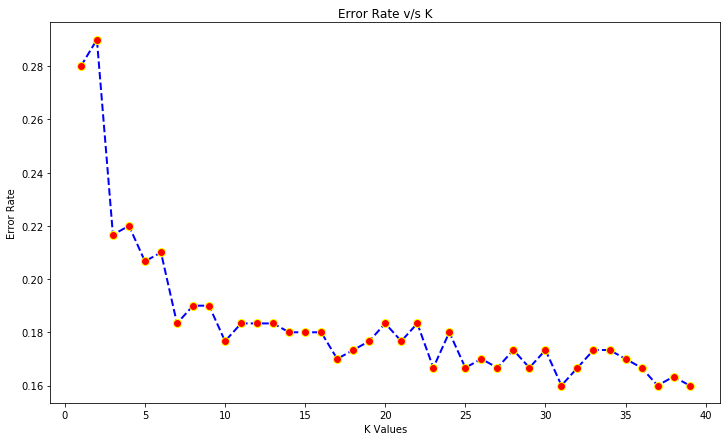

In [16]:
plt.figure(figsize=(12,7))

plt.plot(range(1,40), error_rate, marker = 'o', markerfacecolor='red', markeredgecolor='yellow',ms=8, ls = '--', c='blue', lw=2)
plt.xlabel('K Values')
plt.ylabel('Error Rate')
plt.title('Error Rate v/s K')

from the above figure we can see that the error rate is minimun at 31
so we will k=31 to get highest results

In [17]:
print('K value(s) for minimun error rate')
for i in range(len(error_rate)):
    if error_rate[i] == np.min(error_rate):
        print(i+1)

K value(s) for minimun error rate
31
37
39


### Selecting suitable K and predictions

In [18]:
knn = KNeighborsClassifier(n_neighbors=31)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=31, p=2,
                     weights='uniform')

In [20]:
predictions = knn.predict(X_test)

### Classification Report and Confusion Matrics

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
print('Classification Report','\n\n',classification_report(y_test, predictions))

Classification Report 

               precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [23]:
print('Confusion Matrics\n',confusion_matrix(y_test, predictions))

Confusion Matrics
 [[123  29]
 [ 19 129]]
